In [3]:
import numpy as np
import dask , dask.distributed
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cmocean.cm as cmo
import warnings
warnings.simplefilter('ignore')
import dask_jobqueue
from astropy.convolution import Box2DKernel, convolve
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator, LongitudeLocator)
import matplotlib.colors as colors
import pandas as pd
from fix_grid import fix_grid 

In [ ]:
### Plan: absolute Flüsse korrelieren von FO2,FCO2
### dann gefilterte Flüsse korrelieren vs MA korreliert

In [5]:
pathp='/gxfs_home/geomar/smomw577/plots/Boxcar/0181-0190/'
pathf='/gxfs_work/geomar/smomw577/mesoscale_eddies/BOX_filtered/0181-0190/'
ds=xr.open_dataset('/gxfs_work/geomar/smomw577/mesoscale_eddies/MOM5_concat/0181-0190/MOM5_control_monthly_noice_0181-0190.nc', chunks='auto')
ds_cc=xr.open_dataset('/gxfs_work/geomar/smomw577/mesoscale_eddies/MOM5_concat/0181-0190/MOM5_1PctTo2X_monthly_noice_0181-0190.nc', chunks='auto')
ds=fix_grid(ds)
ds_cc=fix_grid(ds_cc)

In [14]:
corr_ctrl=xr.corr(ds.o2_stf, ds.dic_stf, dim='time')
corr_cc=xr.corr(ds_cc.o2_stf, ds_cc.dic_stf, dim='time')

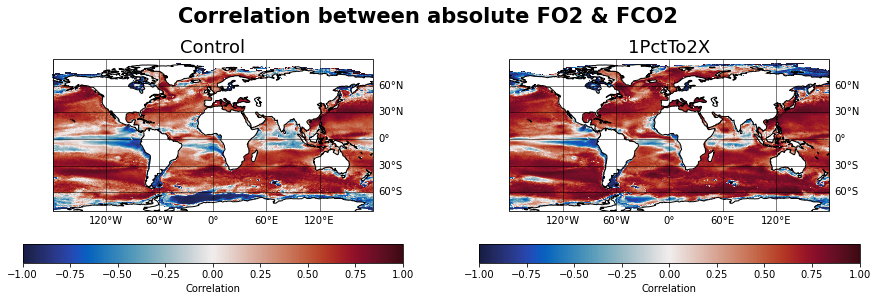

In [16]:
fig, axs= plt.subplots(nrows=1, ncols=2 , figsize=(15,4),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
corr_ctrl.plot(ax=axs[0],vmin=-1, vmax=1, x='geolon_t', y='geolat_t', cmap=cmo.balance, transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "Correlation",'extend':None})
corr_cc.plot(ax=axs[1], vmin=-1, vmax=1, x='geolon_t', y='geolat_t', cmap=cmo.balance, transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "Correlation", 'extend':None})


for i in range(2):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_left = False
    axs[i].coastlines()

axs[0].set_title('Control', fontsize=18);
axs[1].set_title('1PctTo2X', fontsize=18);
plt.suptitle('Correlation between absolute FO2 & FCO2', fontweight='bold', fontsize=21, y=1.06);
#plt.savefig(pathp+'co2_o2_corr.png', dpi=300, bbox_inches='tight');

In [17]:
#### smoothed field

In [30]:
ds_smoothed=xr.open_dataset(pathf+'3x3box_monthly_0181-0190.nc', chunks='auto')
ds_smoothed=fix_grid(ds_smoothed)
ds_smoothed_cc=xr.open_dataset(pathf+'3x3box_monthly_1PctTo2X_0181-0190.nc', chunks='auto')
ds_smoothed_cc=fix_grid(ds_smoothed_cc)

In [31]:
mask=corr_ctrl.notnull()

In [34]:
ds_smoothed=ds_smoothed.where(mask)
ds_smoothed_cc=ds_smoothed_cc.where(mask)

In [35]:
corr_smoothed_ctrl=xr.corr(ds_smoothed.o2_stf, ds_smoothed.dic_stf, dim='time')
corr_smoothed_cc=xr.corr(ds_smoothed_cc.o2_stf, ds_smoothed_cc.dic_stf, dim='time')



In [41]:
corr_smoothed_ctrl.compute()
corr_smoothed_cc.compute()

<xarray.DataArray (yt_ocean: 2700, xt_ocean: 3600)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
    geolon_t  (yt_ocean, xt_ocean) float64 -279.9 -279.8 -279.7 ... 80.0 80.0
    geolat_t  (yt_ocean, xt_ocean) float64 -81.11 -81.11 -81.11 ... 65.06 65.02

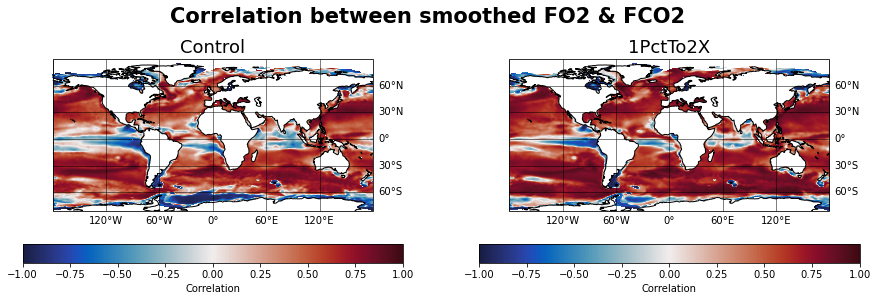

In [42]:
fig, axs= plt.subplots(nrows=1, ncols=2 , figsize=(15,4),subplot_kw={'projection': ccrs.PlateCarree()})
axs=axs.flatten()
corr_smoothed_ctrl.plot(ax=axs[0],vmin=-1, vmax=1, x='geolon_t', y='geolat_t', cmap=cmo.balance, transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "Correlation",'extend':None})
corr_smoothed_cc.plot(ax=axs[1], vmin=-1, vmax=1, x='geolon_t', y='geolat_t', cmap=cmo.balance, transform = ccrs.PlateCarree(),cbar_kwargs={'orientation':'horizontal','label': "Correlation", 'extend':None})


for i in range(2):
    gl = axs[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='black', alpha=0.5)
    gl.xlabels_top = False
    gl.ylabels_left = False
    axs[i].coastlines()

axs[0].set_title('Control', fontsize=18);
axs[1].set_title('1PctTo2X', fontsize=18);
plt.suptitle('Correlation between smoothed FO2 & FCO2', fontweight='bold', fontsize=21, y=1.06);
#plt.savefig(pathp+'co2_o2_corr.png', dpi=300, bbox_inches='tight');